In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from time import sleep

In [2]:
#create our environment
env = gym.make("Taxi-v2").env

env.reset() # reset environment to a new, random state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [3]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [4]:
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

### Q-Learning

In [5]:
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters alpha, gamma, epsilon

def Q_Learning(episodes = 100, alpha = 0.1, gamma = 0.6, epsilon = 0.1):
    # initialize our Q Table
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    # For plotting metrics   

    frames = [] # for animation
    all_rewards = dict()

    for episode in range(1, episodes+1):
        state = env.reset()

        epochs, penalties, reward, sum_rewards, i = 0, 0, 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action) 
            # Put each rendered frame into dict for animation
            frames.append({
                'episode':episode,
                'frame': env.render(mode='ansi'),
                'state': state,
                'action': action,
                'reward': reward
                }
            )

            #get old value
            old_value = q_table[state, action]
            #take maximum expected Q-value for next state
            next_max = np.max(q_table[next_state])
            
            #calculate new Q-value
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            #Update the Q-Table
            q_table[state, action] = new_value

            if reward == -10:
                penalties += 1

            state = next_state
            epochs += 1
            

        if episode % 10 == 0:
            clear_output(wait=True)
            print(f"Episode: {episode}")
        
        #env.render()
        ep = episode
        for i, frame in enumerate(frames):
            #sum rewards for this episode
            if(ep == frame['episode']):
                clear_output(wait=True)
                sum_rewards += frame['reward']
                print(frame['frame'].getvalue())
                print(f"--> Episode: {frame['episode']}")
                print(f"Timestep: {i + 1}")
                print(f"State: {frame['state']}")
                print(f"Action: {frame['action']}")
                print(f"Reward: {frame['reward']}")
                print(f"Sum of rewards: {sum_rewards}")
                sleep(.05)
        
        #sum
        all_rewards[episode] = sum_rewards

    print("Training finished.\n")
    return frames, all_rewards

In [25]:
%%time

#Q-Learning with epsilon = 0.1 "lower epsilon" // episodes = 10
frames_1, all_rewards_1 = Q_Learning(episodes=10)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

--> Episode: 10
Timestep: 7297
State: 97
Action: 5
Reward: 20
Sum of rewards: -654
Training finished.

CPU times: user 28 s, sys: 6.71 s, total: 34.7 s
Wall time: 6min 33s


In [21]:
%%time

#Q-Learning with epsilon = 0.1 "lower epsilon" // episodes = 50
frames_2, all_rewards_2 = Q_Learning(episodes=50)

Training finished.

CPU times: user 28 s, sys: 5.67 s, total: 33.6 s
Wall time: 33.8 s


In [22]:
%%time

#Q-Learning with epsilon = 0.1 "lower epsilon" // episodes = 100
frames_3, all_rewards_3 = Q_Learning(episodes=100)

Training finished.

CPU times: user 41.8 s, sys: 7.82 s, total: 49.7 s
Wall time: 52.7 s


In [23]:
%%time

#Q-Learning with epsilon = 0.1 "lower epsilon" // episodes = 150
frames_4, all_rewards_4 = Q_Learning(episodes=150)

Training finished.

CPU times: user 53.3 s, sys: 10.3 s, total: 1min 3s
Wall time: 1min 4s


In [30]:
def get_episodes_rewards(plot_rewards):
    episodes = []

    for key in plot_rewards.keys():
          episodes.append(key)

    rewards = []

    for value in plot_rewards.values():
          rewards.append(value)
            
    return episodes, rewards

In [31]:
ep_1, re_1 = get_episodes_rewards(all_rewards_1)

In [32]:
ep_2, re_2 = get_episodes_rewards(all_rewards_2)

In [33]:
ep_3, re_3 = get_episodes_rewards(all_rewards_3)

In [34]:
ep_4, re_4 = get_episodes_rewards(all_rewards_4)

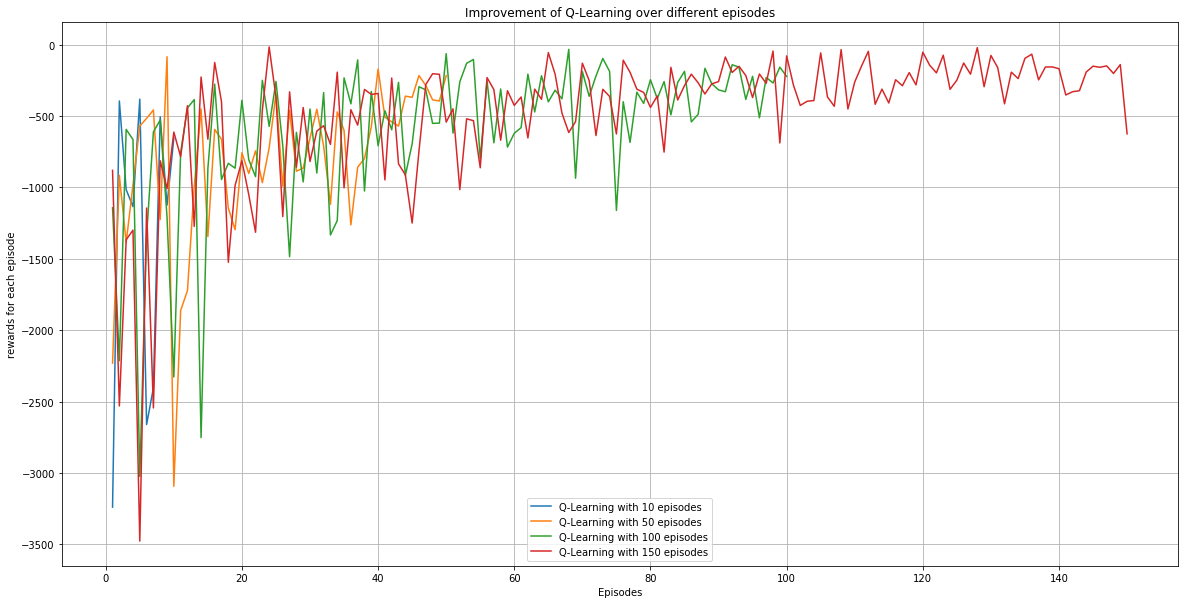

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(ep_1, re_1)
ax.plot(ep_2, re_2)
ax.plot(ep_3, re_3)
ax.plot(ep_4, re_4)


ax.set(xlabel='Episodes', ylabel='rewards for each episode',
       title='Improvement of Q-Learning over different episodes')
ax.legend(('Q-Learning with 10 episodes', 'Q-Learning with 50 episodes', 'Q-Learning with 100 episodes', 'Q-Learning with 150 episodes'), loc='lower center')
ax.grid()
plt.show(block=True)

In [9]:
%%time

#Q-Learning with epsilon = 0.1 "lower epsilon"
frames_11, all_rewards_11 = Q_Learning(episodes=100, epsilon=0.1)

Training finished.

CPU times: user 43.7 s, sys: 8.96 s, total: 52.7 s
Wall time: 54.8 s


In [11]:
%%time

#Q-Learning with epsilon = 0.5 "lower epsilon"
frames_12,all_rewards_12 = Q_Learning(episodes=100, epsilon=0.5)

In [ ]:
%%time

#Q-Learning with epsilon = 0.9 "lower epsilon"
frames_13,all_rewards_13 = Q_Learning(episodes=100, epsilon=0.9)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

--> Episode: 10
Timestep: 22449
State: 464
Action: 3
Reward: -1
Sum of rewards: -3407


### plot rewards over episodes

In [37]:
def get_avg_rewards(frames):
    #init
    ep = 1
    N = 0
    avg_rewards = 0
    plot_rewards = dict()

    for i, frame in enumerate(frames):
        if(ep == frame['episode']):
            avg_rewards += frame['reward']
            N += 1
        #calculate avg of rewards
        if(ep != frame['episode']):
            avg_rewards /= N
            plot_rewards[ep] = avg_rewards
            avg_rewards = 0
            N = 0
        #change episode when its done
        ep = frame['episode']
        
    return plot_rewards

In [38]:
plot_rewards_11 = get_avg_rewards(frames_11)

In [39]:
plot_rewards_12 = get_avg_rewards(frames_12)

In [3]:
plot_rewards_13 = get_avg_rewards(frames_13)

In [26]:
episodes_1, rewards_1 = get_episodes_rewards(plot_rewards_11)

In [27]:
episodes_2, rewards_2 = get_episodes_rewards(plot_rewards_12)

In [28]:
episodes_3, rewards_3 = get_episodes_rewards(plot_rewards_13)

### Exploration Exploitation Tradeoff

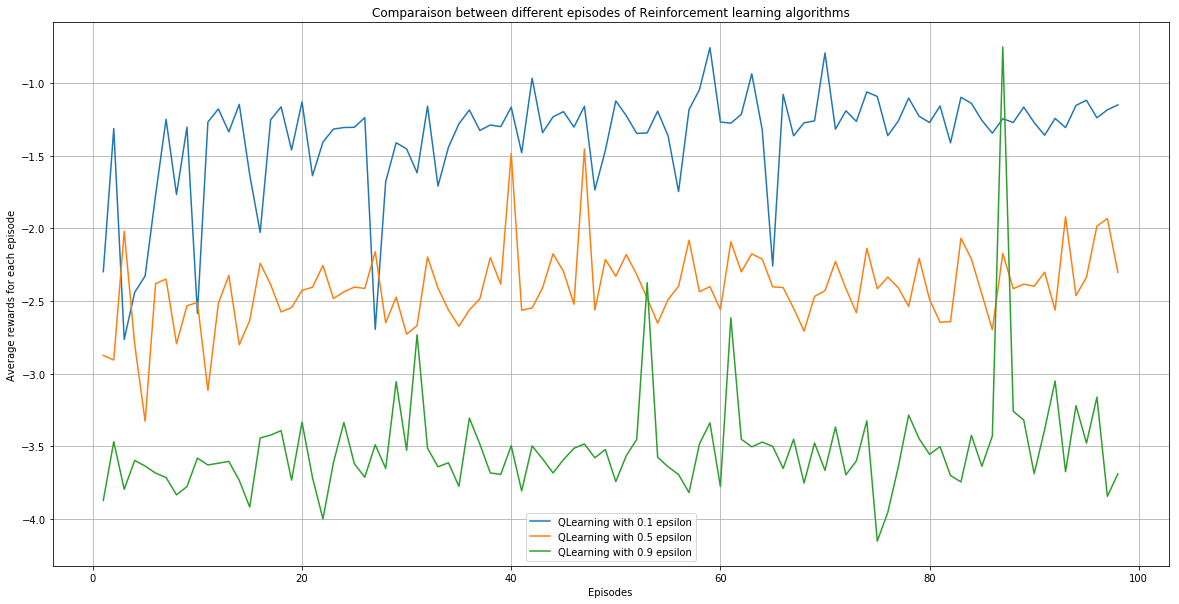

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(episodes_1, rewards_1)
ax.plot(episodes_2, rewards_2)
ax.plot(episodes_3, rewards_3)

ax.set(xlabel='Episodes', ylabel='Average rewards for each episode',
       title='Comparaison between different episodes of Reinforcement learning algorithms')
ax.legend(('QLearning with 0.1 epsilon', 'QLearning with 0.5 epsilon', 'QLearning with 0.9 epsilon'), loc='lower center')
ax.grid()

In [2]:
# INITIALIZATION: libraries, parameters, network...

from keras.models import Sequential      # One layer after the other
from keras.layers import Dense, Flatten  # Dense layers are fully connected layers, Flatten layers flatten out multidimensional inputs
from collections import deque            # For storing moves 

import numpy as np
import gym                                # To train our network
env = gym.make('MountainCar-v0')          # Choose game (any in the gym should work)

import random     # For sampling batches from the observations


# Create network. Input is two consecutive game states, output is Q-values of the possible moves.
model = Sequential()
model.add(Dense(20, input_shape=(2,) + env.observation_space.shape, init='uniform', activation='relu'))
model.add(Flatten())       # Flatten input so as to have no problems with processing
model.add(Dense(18, init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='relu'))
model.add(Dense(env.action_space.n, init='uniform', activation='linear'))    # Same number of outputs as possible actions

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Parameters
D = deque()                                # Register where the actions will be stored

observetime = 500                          # Number of timesteps we will be acting on the game and observing results
epsilon = 0.7                              # Probability of doing a random move
gamma = 0.9                                # Discounted future reward. How much we care about steps further in time
mb_size = 50                               # Learning minibatch size

Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, input_shape=(2, 2), activation="relu", kernel_initializer="uniform")`
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(18, activation="relu", kernel_initializer="uniform")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="linear", kernel_initializer="uniform")`


In [3]:
# FIRST STEP: Knowing what each action does (Observing)

observation = env.reset()                     # Game begins
obs = np.expand_dims(observation, axis=0)     # (Formatting issues) Making the observation the first element of a batch of inputs 
state = np.stack((obs, obs), axis=1)
done = False
for t in range(observetime):
    if np.random.rand() <= epsilon:
        action = np.random.randint(0, env.action_space.n, size=1)[0]
    else:
        Q = model.predict(state)          # Q-values predictions
        action = np.argmax(Q)             # Move with highest Q-value is the chosen one
    observation_new, reward, done, info = env.step(action)     # See state of the game, reward... after performing the action
    obs_new = np.expand_dims(observation_new, axis=0)          # (Formatting issues)
    state_new = np.append(np.expand_dims(obs_new, axis=0), state[:, :1, :], axis=1)     # Update the input with the new state of the game
    D.append((state, action, reward, state_new, done))         # 'Remember' action and consequence
    state = state_new         # Update state
    if done:
        env.reset()           # Restart game if it's finished
        obs = np.expand_dims(observation, axis=0)     # (Formatting issues) Making the observation the first element of a batch of inputs 
        state = np.stack((obs, obs), axis=1)
print('Observing Finished')

Observing Finished


In [4]:
# SECOND STEP: Learning from the observations (Experience replay)

minibatch = random.sample(D, mb_size)                              # Sample some moves

inputs_shape = (mb_size,) + state.shape[1:]
inputs = np.zeros(inputs_shape)
targets = np.zeros((mb_size, env.action_space.n))

for i in range(0, mb_size):
    state = minibatch[i][0]
    action = minibatch[i][1]
    reward = minibatch[i][2]
    state_new = minibatch[i][3]
    done = minibatch[i][4]
    
# Build Bellman equation for the Q function
    inputs[i:i+1] = np.expand_dims(state, axis=0)
    targets[i] = model.predict(state)
    Q_sa = model.predict(state_new)
    
    if done:
        targets[i, action] = reward
    else:
        targets[i, action] = reward + gamma * np.max(Q_sa)

# Train network to output the Q function
    model.train_on_batch(inputs, targets)
print('Learning Finished')

Learning Finished


In [5]:
# THIRD STEP: Play!

observation = env.reset()
obs = np.expand_dims(observation, axis=0)
state = np.stack((obs, obs), axis=1)
done = False
tot_reward = 0.0
while not done:
    env.render()                    # Uncomment to see game running
    Q = model.predict(state)        
    action = np.argmax(Q)         
    observation, reward, done, info = env.step(action)
    obs = np.expand_dims(observation, axis=0)
    state = np.append(np.expand_dims(obs, axis=0), state[:, :1, :], axis=1)    
    tot_reward += reward
print('Game ended! Total reward: {}'.format(reward))

Game ended! Total reward: -1.0
